In [2]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.1" 2018-10-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.1+13-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.1+13-LTS, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/79/8vg87rnd3rj6bg7rtfq66cvr0000gn/T/tmprfe0_guc
  JVM stdout: /var/folders/79/8vg87rnd3rj6bg7rtfq66cvr0000gn/T/tmprfe0_guc/h2o_waynewu_started_from_python.out
  JVM stderr: /var/folders/79/8vg87rnd3rj6bg7rtfq66cvr0000gn/T/tmprfe0_guc/h2o_waynewu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Taipei
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_waynewu_el90x8
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 20, 12
from six.moves import range

In [7]:
train_with_labels = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz")
test_with_labels = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/test.csv.gz")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
predictors = list(range(0,784))
train = train_with_labels[predictors]
test = test_with_labels[predictors]

In [11]:
# Training
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
model = H2OAutoEncoderEstimator(activation = "Tanh", hidden = [20], ignore_const_cols=False, epochs=1)
model.train(x=predictors, training_frame=train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [13]:
# Testing
test_rec_error = model.anomaly(test)
test_rec_error.describe()

Rows:10000
Cols:1




,Reconstruction.MSE
type,real
mins,0.006181554709842671
mean,0.024779950246560337
maxs,1.5900189935122901
sigma,0.01813190708089472
zeros,0
missing,0
0,0.022595100396716857
1,0.02144068310182602
2,0.0459228456611246


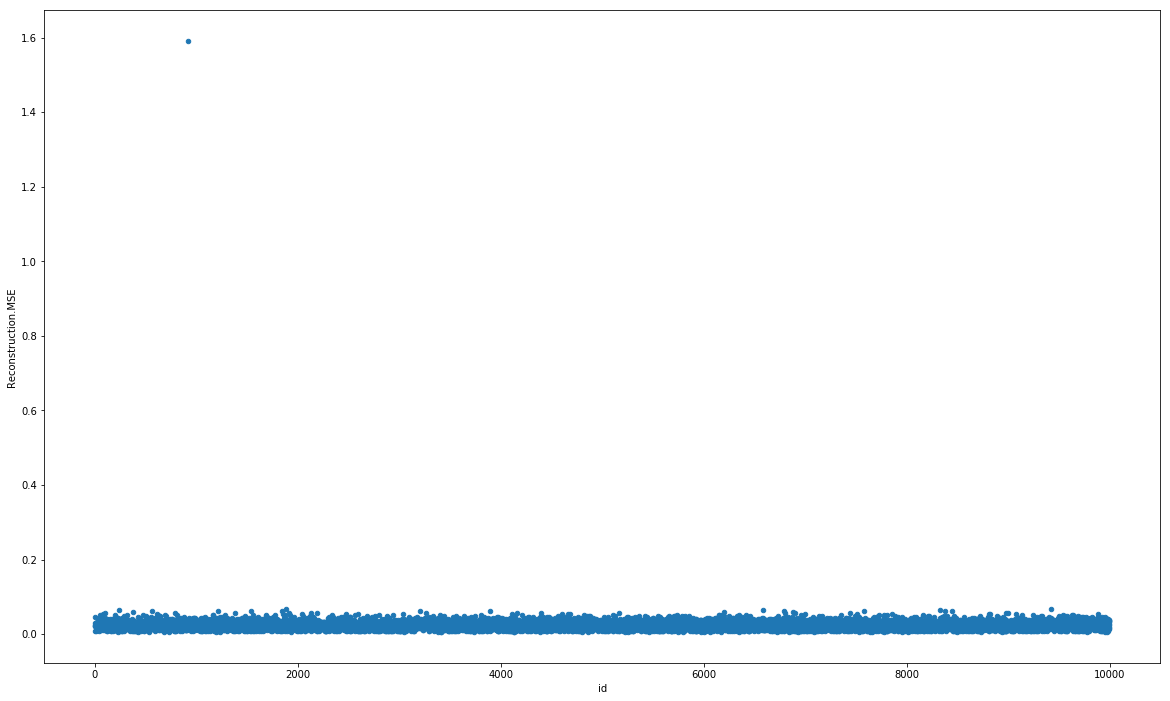

In [14]:
test_rec_error_df = test_rec_error.as_data_frame()
test_rec_error_df['id'] = test_rec_error_df.index
test_rec_error_df.plot(kind='scatter', x='id', y='Reconstruction.MSE')